# Phase and Amplitude Noise
Consider a monochromatic signal with noise:
    
$$ x(t) = (A + E(t)) \sin(\omega t + \phi(t)) $$

where A and $\omega$ are fixed. $E(t)$ causes amplitude fluctuations and is called AM noise, while $\phi(t)$ is called phase noise.

I will model $E(t)$ and $\phi(t)$ as white noise.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating white noise

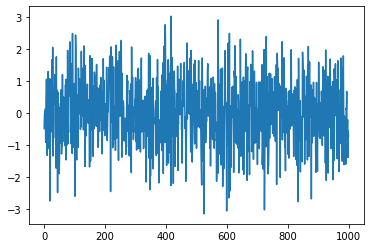

In [4]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
plt.plot(samples)

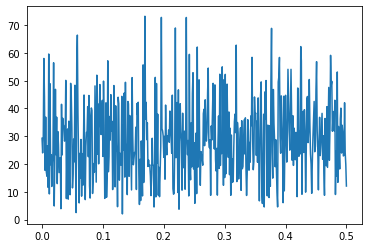

In [11]:
# going to frequency space
fft = np.fft.rfft(samples)
freq = np.fft.rfftfreq(len(samples))
plt.plot(freq,np.abs(fft))

In [69]:
def gen_white_noise(num_samples):
    mean = 0
    std = 1 
    samples = np.random.normal(mean, std, size=num_samples)
    return samples

## Signal with phase noise

In [70]:
omega = 1.5
A = 1
num_periods = 100
num_samples = 100*num_periods
t = np.linspace(0,num_periods*2*np.pi/omega,num_samples)
signal = A * np.cos(omega*t)

(0.9, 1.1)

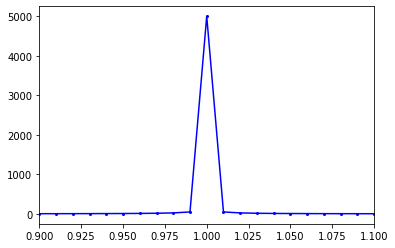

In [71]:
fft = np.fft.rfft(signal)
# 1/d is num of samples per period so that frequencies are in units of omega
freq = np.fft.rfftfreq(len(signal),d=1/(num_samples/num_periods))
plt.plot(freq,np.abs(fft),color='b',marker='o',markersize=2)
plt.xlim([0.90,1.10])




Text(0.5, 0, 'Freq. (units of $\\omega$)')

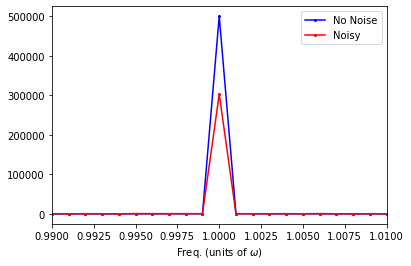

In [78]:
omega = 1.5
A = 1
num_periods = 1000
num_samples = 1000*num_periods
t = np.linspace(0,num_periods*2*np.pi/omega,num_samples)

# signal with noise
phase_noise = 1*gen_white_noise(num_samples) 
am_noise = 0*gen_white_noise(num_samples) 
signal = A * np.cos(omega*t)
noisy_signal = (A + am_noise) * np.cos(omega*t + phase_noise) 

fft = np.fft.rfft(signal)
# 1/d is num of samples per period so that frequencies are in units of omega
freq = np.fft.rfftfreq(len(signal),d=1/(num_samples/num_periods))
plt.plot(freq,np.abs(fft),color='b',marker='o',markersize=2,label="No Noise")

fft_noisy = np.fft.rfft(noisy_signal)
plt.plot(freq,np.abs(fft_noisy),color='r',marker='o',markersize=2,label="Noisy")
plt.legend()

plt.xlim([0.99,1.01])

plt.xlabel(r"Freq. (units of $\omega$)")